# Dataset


##- It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

##- The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

##- It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise

##  Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Read the dataset and start the spark session

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset sic/fraudTrain.csv')


## Data info and descreption

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## Check Missing Values

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
df.dropna(inplace=True)

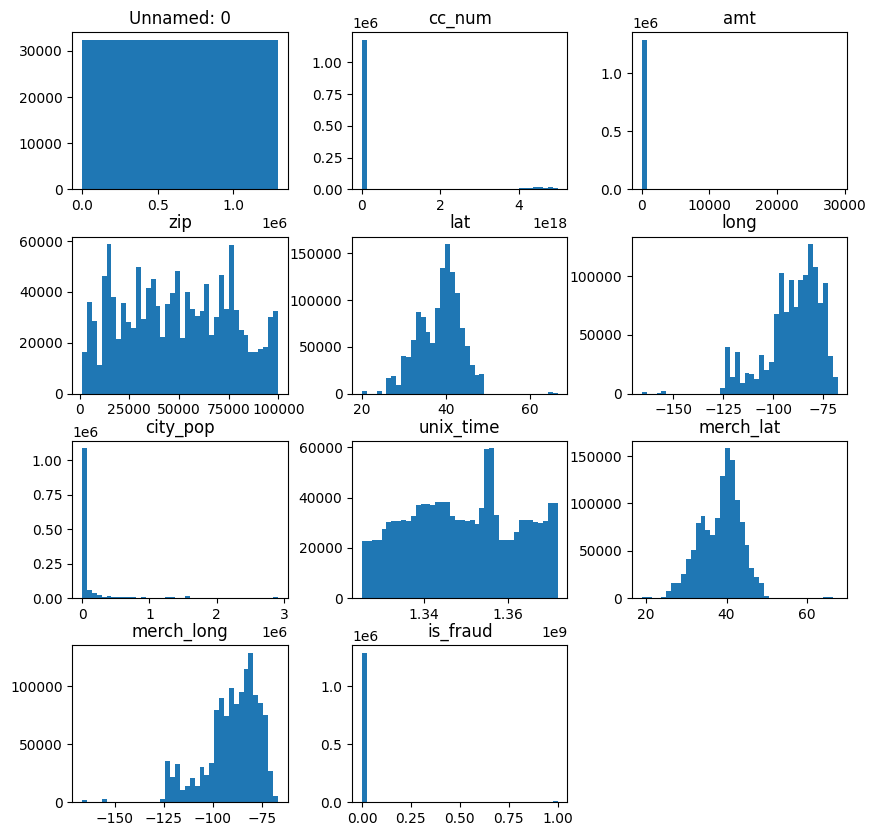

In [ ]:
df.hist(figsize = (10,10), grid=False,bins = 40)
plt.show()

## Changing Data types

## **EDA**

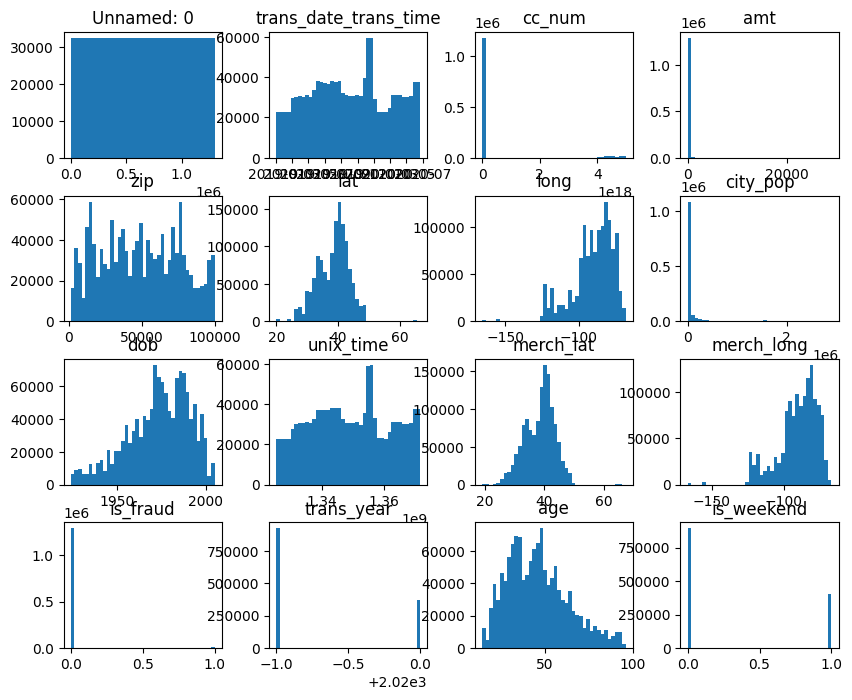

In [ ]:
df.hist(figsize = (10,8), grid=False,bins = 40)
plt.show()

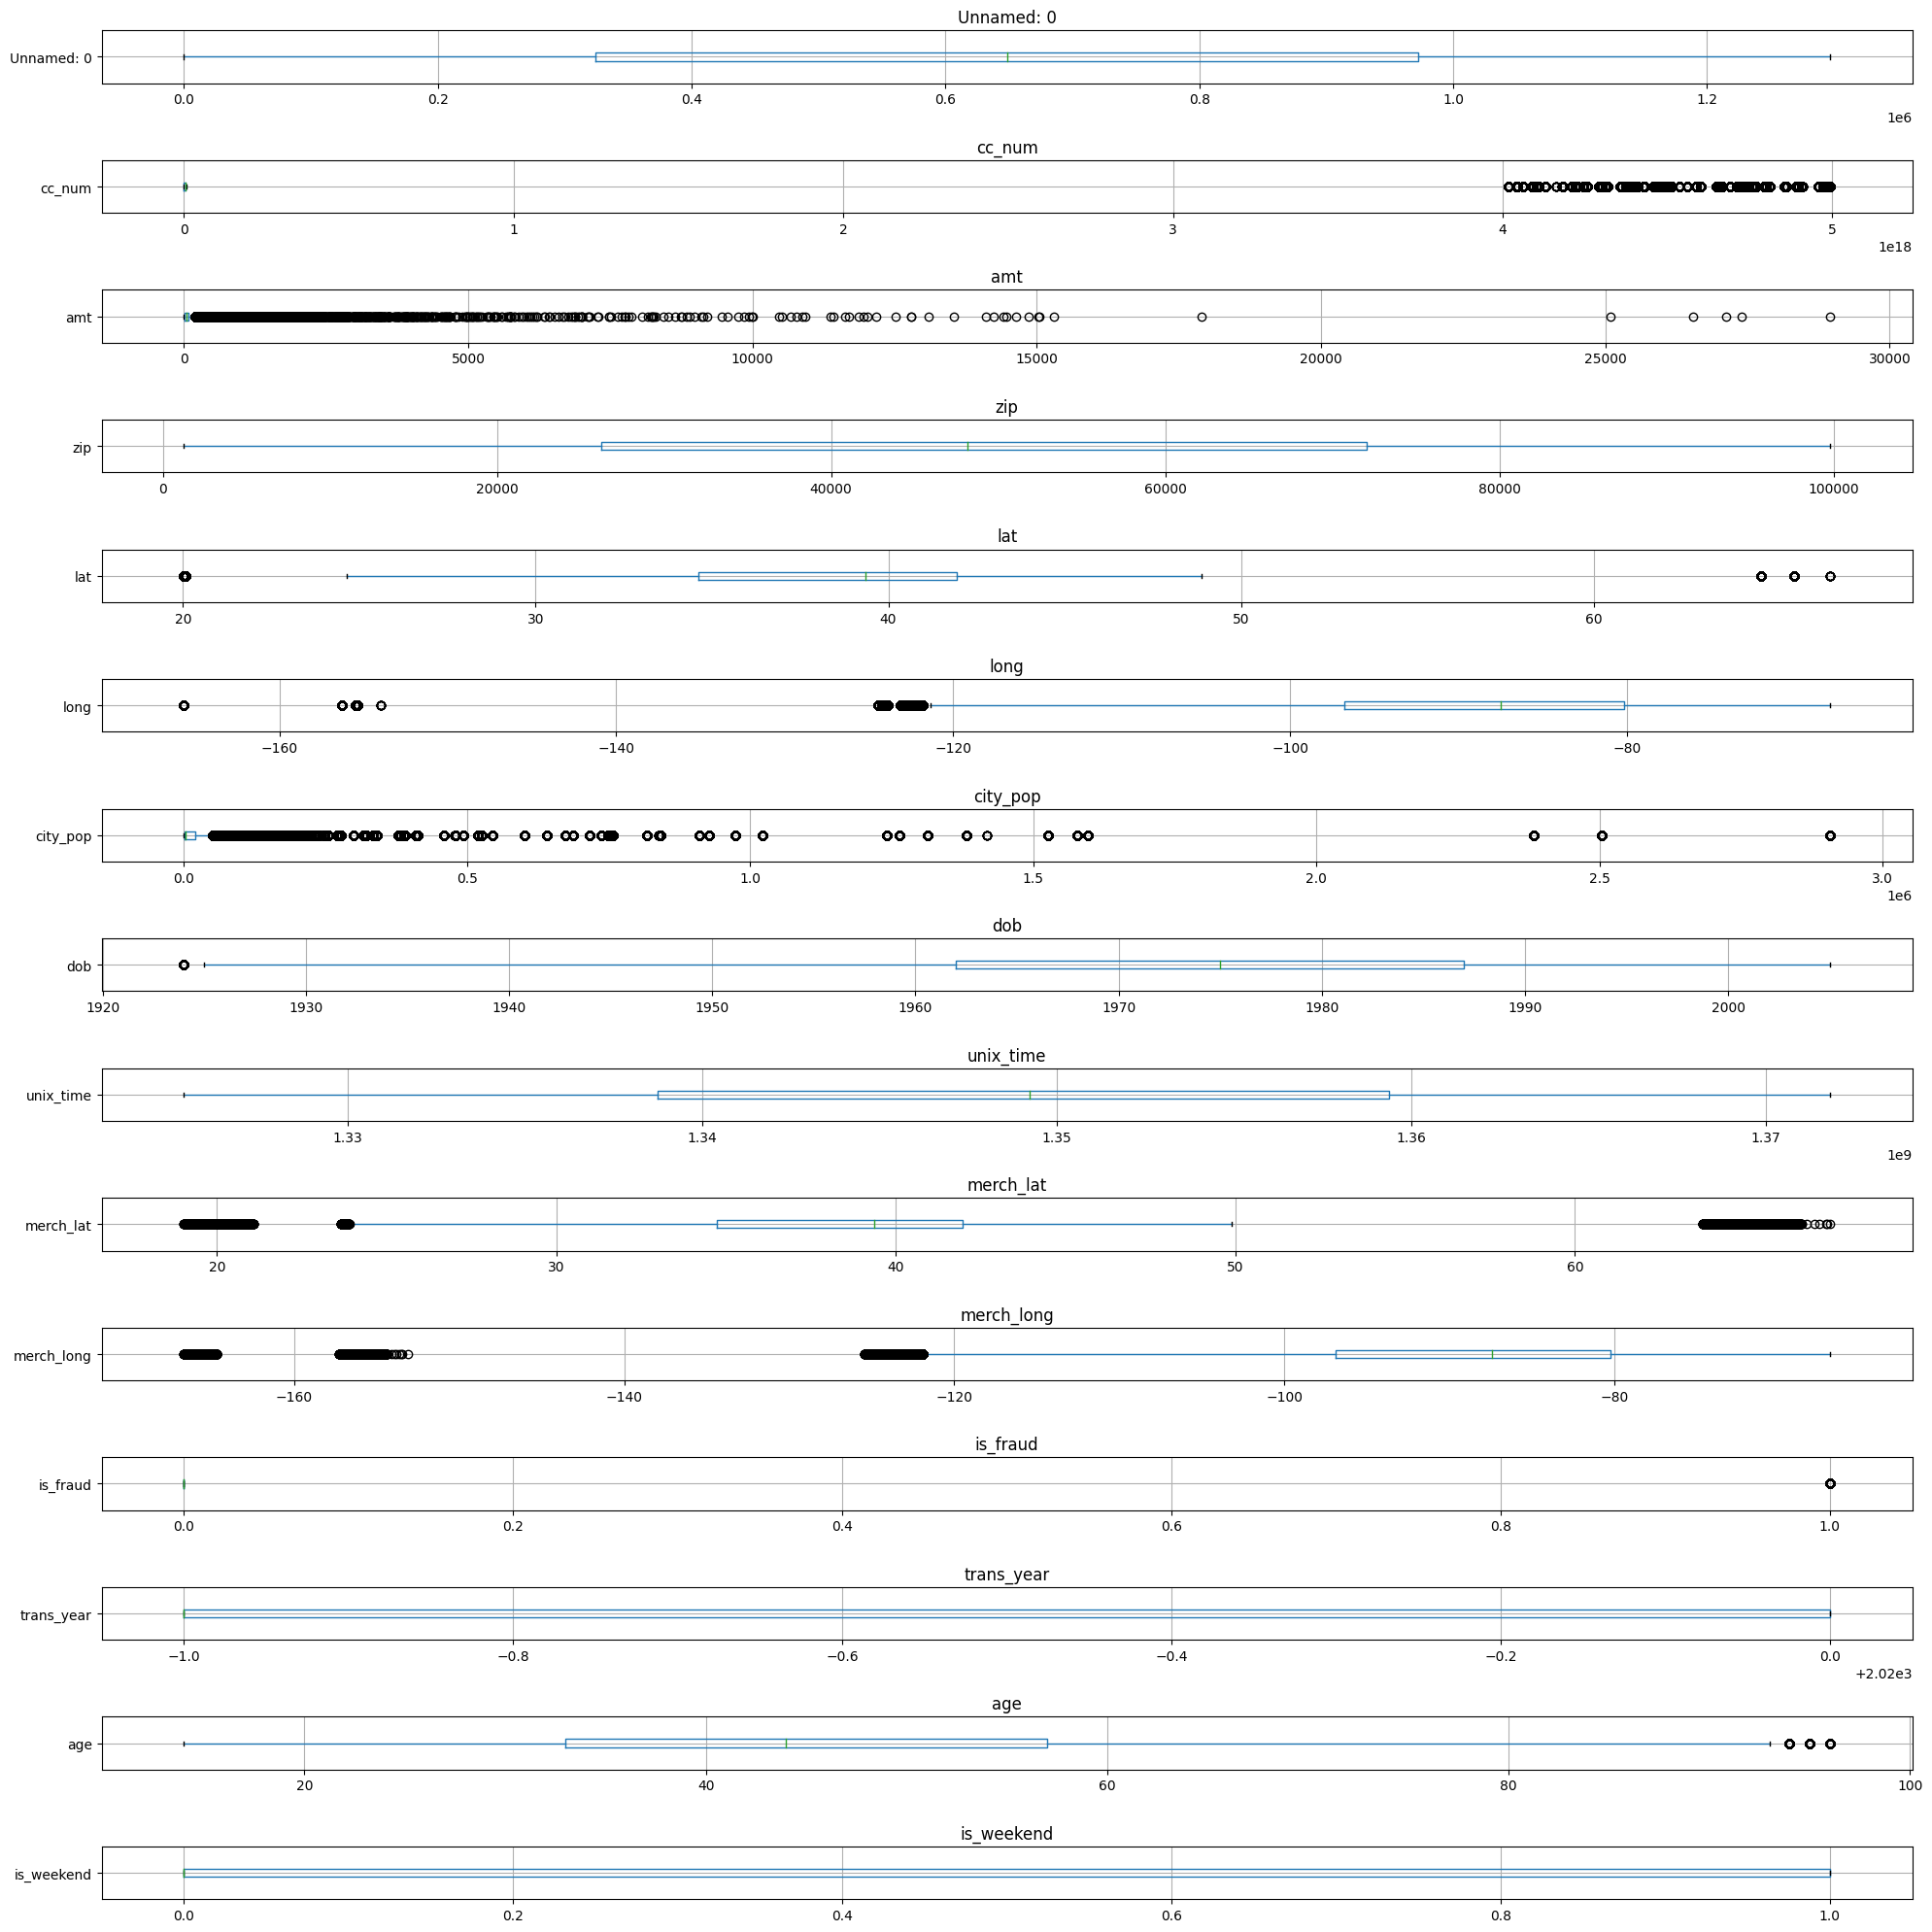

In [ ]:
fig, axes = plt.subplots(nrows = len(num_data.columns), figsize = (20, 20), sharex = False)

for i, column in enumerate(num_data.columns):
    num_data.boxplot(column, ax=axes[i], vert = False)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

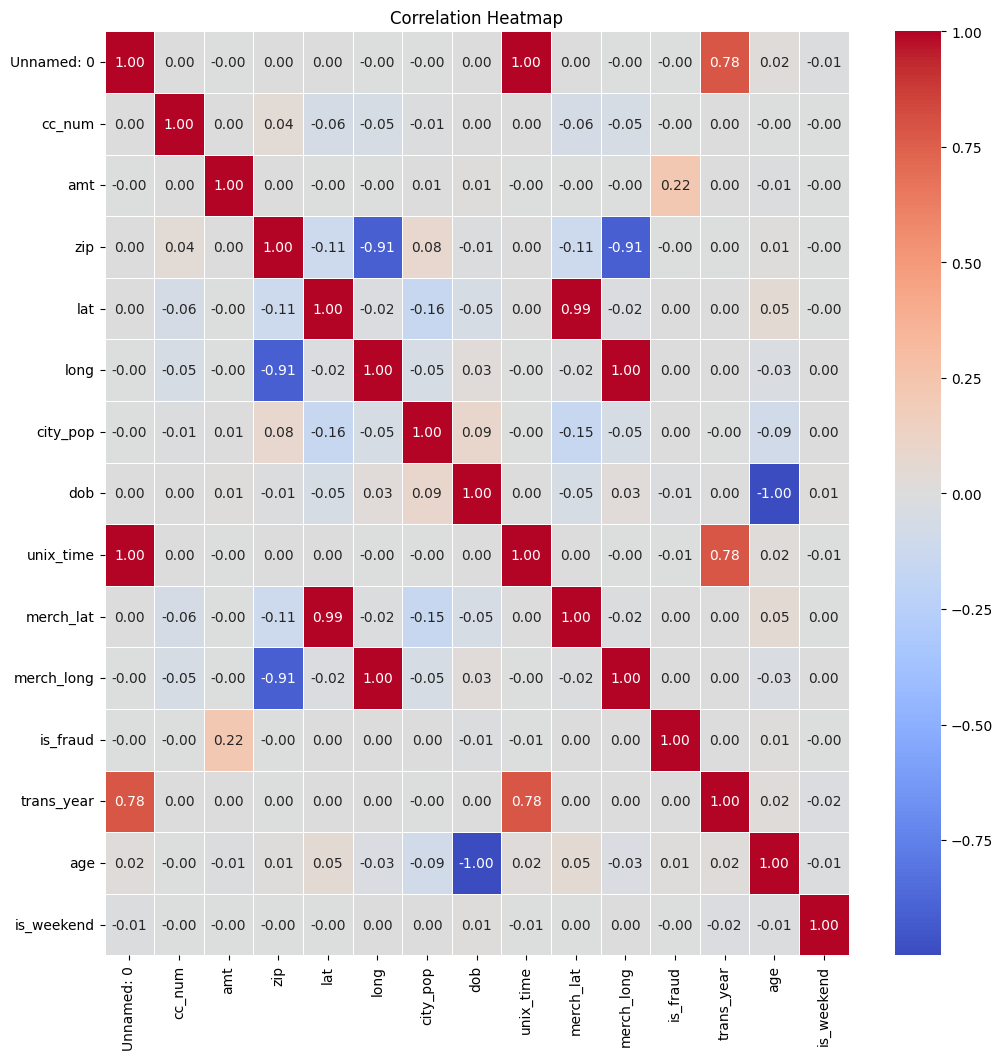

In [ ]:
corr_matrix = num_data.corr()

plt.figure(figsize=(12, 12))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

# Get more insight from these data

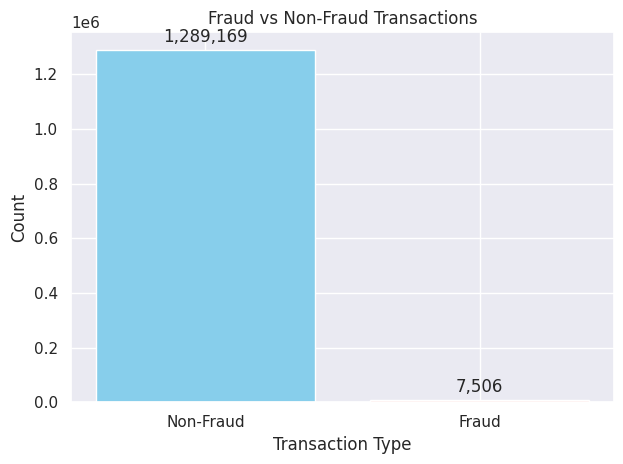

In [ ]:
fraud_counts = df['is_fraud'].value_counts()
labels = ['Non-Fraud', 'Fraud']
counts = fraud_counts.sort_index().values

fig, ax = plt.subplots()
bars = ax.bar(labels, counts, color=['skyblue', 'salmon'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)
ax.set_title('Fraud vs Non-Fraud Transactions')
ax.set_ylabel('Count')
ax.set_xlabel('Transaction Type')
plt.tight_layout()
plt.show()


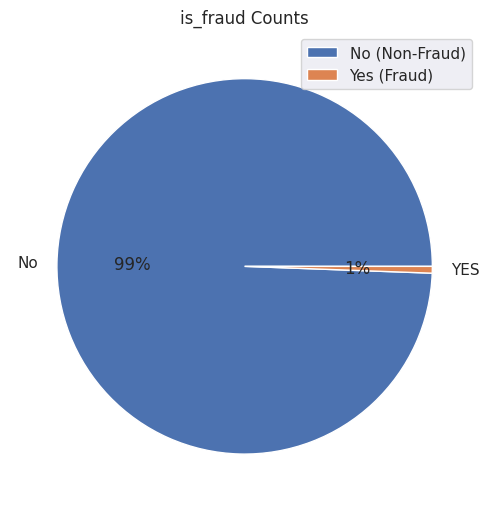

In [ ]:
exit_counts = df["is_fraud"].value_counts()
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.legend(["No (Non-Fraud)", "Yes (Fraud)"], loc="upper right")
plt.title("is_fraud Counts")
plt.tight_layout()
plt.show()

In [ ]:
fraud = df[df.is_fraud == 1]
not_fraud = df[df.is_fraud == 0]

<ipython-input-47-a5cd42d2a8f1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Counts", data=cat_fraud, ax=axes[0], palette = "rocket")
<ipython-input-47-a5cd42d2a8f1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Counts", data=cat_not_fraud, ax=axes[1], palette = "rocket")


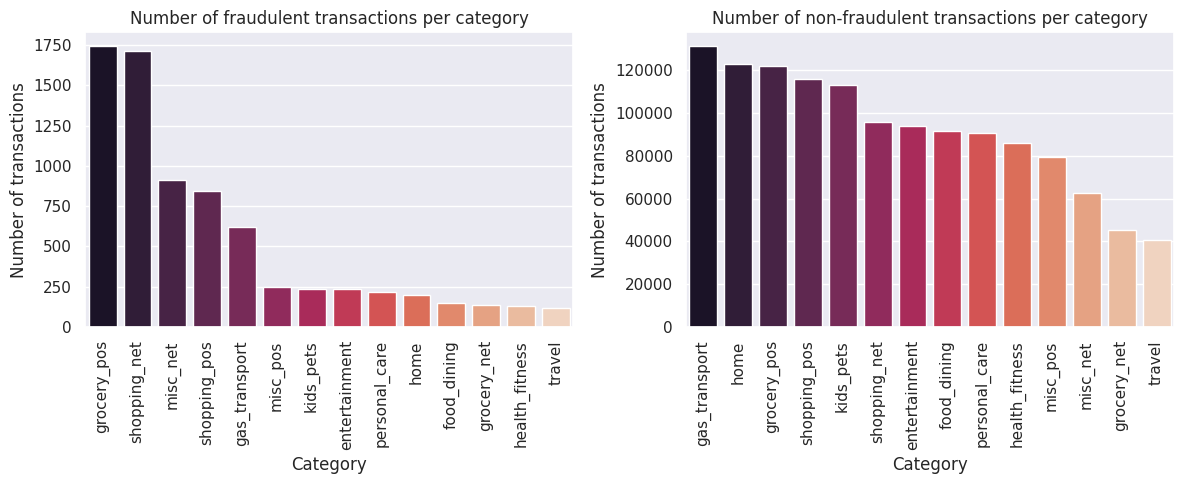

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme()

cat_fraud = fraud.category.value_counts().reset_index()
cat_fraud.columns = ["Category", "Counts"]
cat_not_fraud = not_fraud.category.value_counts().reset_index()
cat_not_fraud.columns = ["Category", "Counts"]

sns.barplot(x="Category", y="Counts", data=cat_fraud, ax=axes[0], palette = "rocket")
axes[0].set_title("Number of fraudulent transactions per category")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Number of transactions")
axes[0].tick_params(axis="x", rotation=90)

sns.barplot(x="Category", y="Counts", data=cat_not_fraud, ax=axes[1], palette = "rocket")
axes[1].set_title("Number of non-fraudulent transactions per category")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Number of transactions")

axes[1].tick_params(axis="x", rotation=90)

plt.tight_layout()

<ipython-input-48-25c5e437d068>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="Counts", data=g_fraud, ax=axes[0], palette="rocket")
<ipython-input-48-25c5e437d068>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="Counts", data=g_not_fraud, ax=axes[1], palette="rocket")


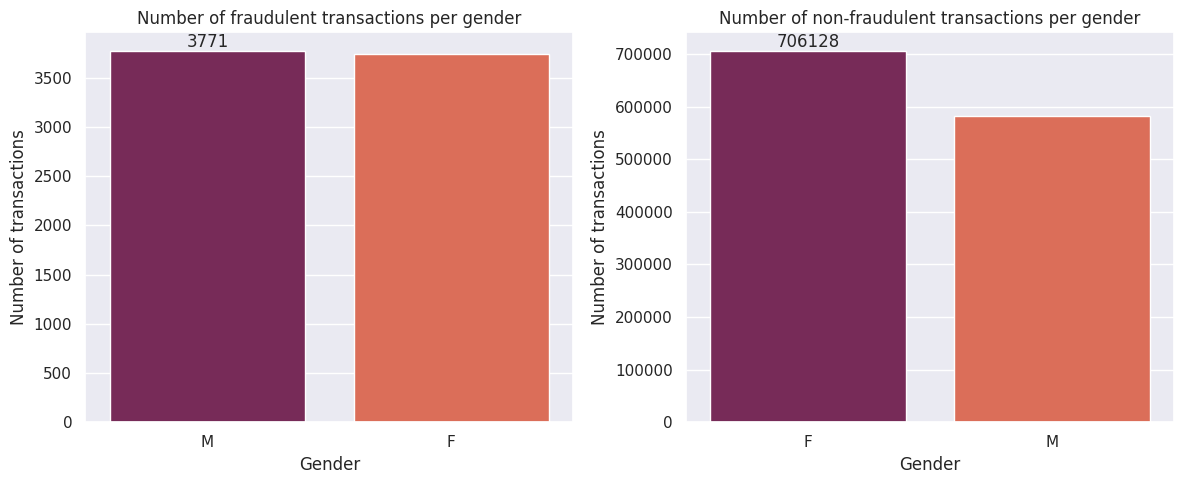

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme()

g_fraud = fraud.gender.value_counts().reset_index()
g_fraud.columns = ["Gender", "Counts"]
g_not_fraud = not_fraud.gender.value_counts().reset_index()
g_not_fraud.columns = ["Gender", "Counts"]

sns.barplot(x="Gender", y="Counts", data=g_fraud, ax=axes[0], palette="rocket")
axes[0].set_title("Number of fraudulent transactions per gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Gender", y="Counts", data=g_not_fraud, ax=axes[1], palette="rocket")
axes[1].set_title("Number of non-fraudulent transactions per gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

<ipython-input-49-1dd7f368b21e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="job_sector", y="Counts", data=cat_fraud, ax=axes[0], palette = "rocket")
<ipython-input-49-1dd7f368b21e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="job_sector", y="Counts", data=cat_not_fraud, ax=axes[1], palette = "rocket")


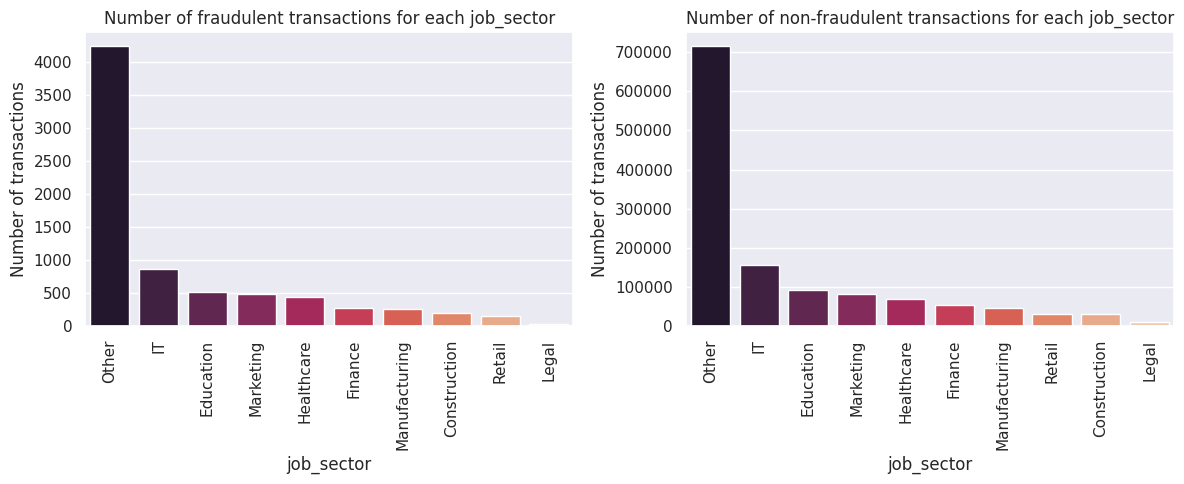

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme()

cat_fraud = fraud.job_sector.value_counts().reset_index()
cat_fraud.columns = ["job_sector", "Counts"]
cat_not_fraud = not_fraud.job_sector.value_counts().reset_index()
cat_not_fraud.columns = ["job_sector", "Counts"]

sns.barplot(x="job_sector", y="Counts", data=cat_fraud, ax=axes[0], palette = "rocket")
axes[0].set_title("Number of fraudulent transactions for each job_sector")
axes[0].set_xlabel("job_sector")
axes[0].set_ylabel("Number of transactions")
axes[0].tick_params(axis="x", rotation=90)

sns.barplot(x="job_sector", y="Counts", data=cat_not_fraud, ax=axes[1], palette = "rocket")
axes[1].set_title("Number of non-fraudulent transactions for each job_sector")
axes[1].set_xlabel("job_sector")
axes[1].set_ylabel("Number of transactions")

axes[1].tick_params(axis="x", rotation=90)

plt.tight_layout()

In [ ]:
age_fraud = df[df.is_fraud == 1].age_group.value_counts().reset_index()
age_fraud.columns = ["Age group", "Counts"]
age_not_fraud = df[df.is_fraud == 0].age_group.value_counts().reset_index()
age_not_fraud.columns = ["Age group", "Counts"]

<ipython-input-51-15d26d9a0205>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Age group", y="Counts", data=age_fraud, ax=axes[0], palette="rocket")
<ipython-input-51-15d26d9a0205>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Age group", y="Counts", data=age_not_fraud, ax=axes[1], palette="rocket")


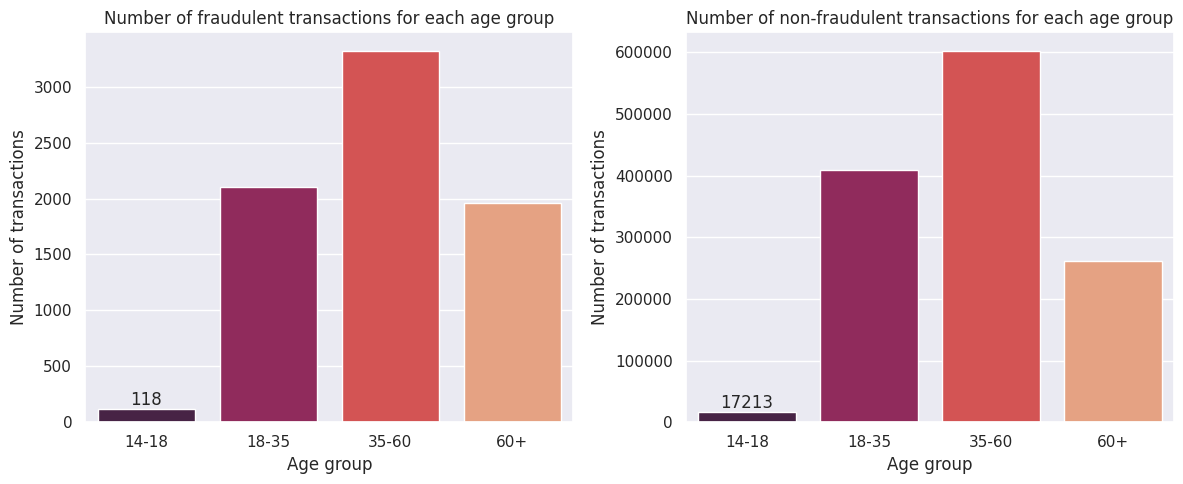

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme()

sns.barplot(x="Age group", y="Counts", data=age_fraud, ax=axes[0], palette="rocket")
axes[0].set_title("Number of fraudulent transactions for each age group")
axes[0].set_xlabel("Age group")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Age group", y="Counts", data=age_not_fraud, ax=axes[1], palette="rocket")
axes[1].set_title("Number of non-fraudulent transactions for each age group")
axes[1].set_xlabel("Age group")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

<ipython-input-52-5280a36c3b51>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Counts", data=r_fraud, ax=axes[0], palette= "rocket")
<ipython-input-52-5280a36c3b51>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Counts", data=r_not_fraud, ax=axes[1], palette="rocket")


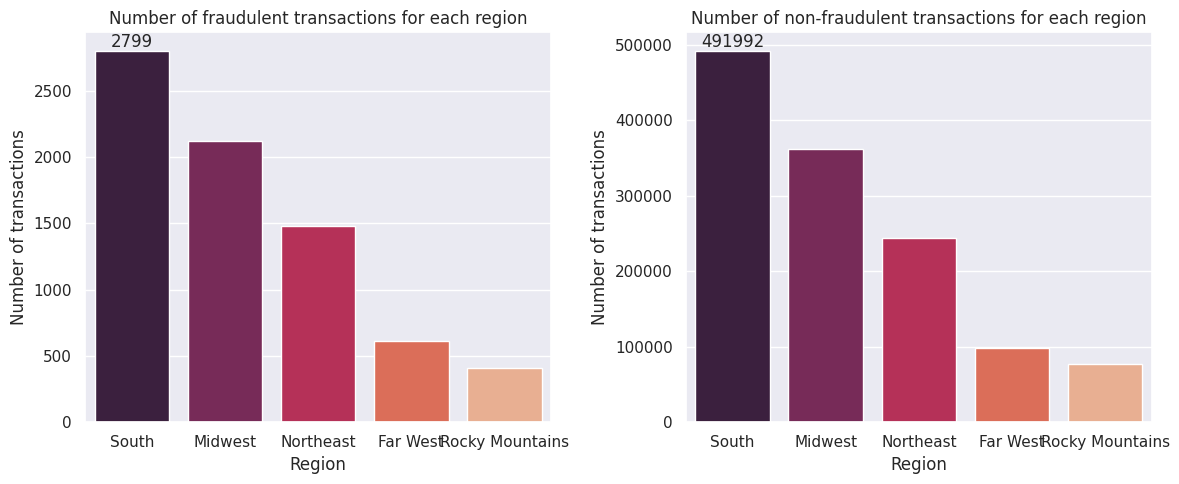

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme()

r_fraud = df[df.is_fraud == 1].Region.value_counts().reset_index()
r_fraud.columns = ["Region", "Counts"]
r_not_fraud = df[df.is_fraud == 0].Region.value_counts().reset_index()
r_not_fraud.columns = ["Region", "Counts"]

sns.barplot(x="Region", y="Counts", data=r_fraud, ax=axes[0], palette= "rocket")
axes[0].set_title("Number of fraudulent transactions for each region")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Region", y="Counts", data=r_not_fraud, ax=axes[1], palette="rocket")
axes[1].set_title("Number of non-fraudulent transactions for each region")
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

<ipython-input-53-ab3ea794b0e7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="Counts", data=g_fraud, ax=axes[0], palette="rocket")
<ipython-input-53-ab3ea794b0e7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="Counts", data=g_not_fraud, ax=axes[1], palette="rocket")


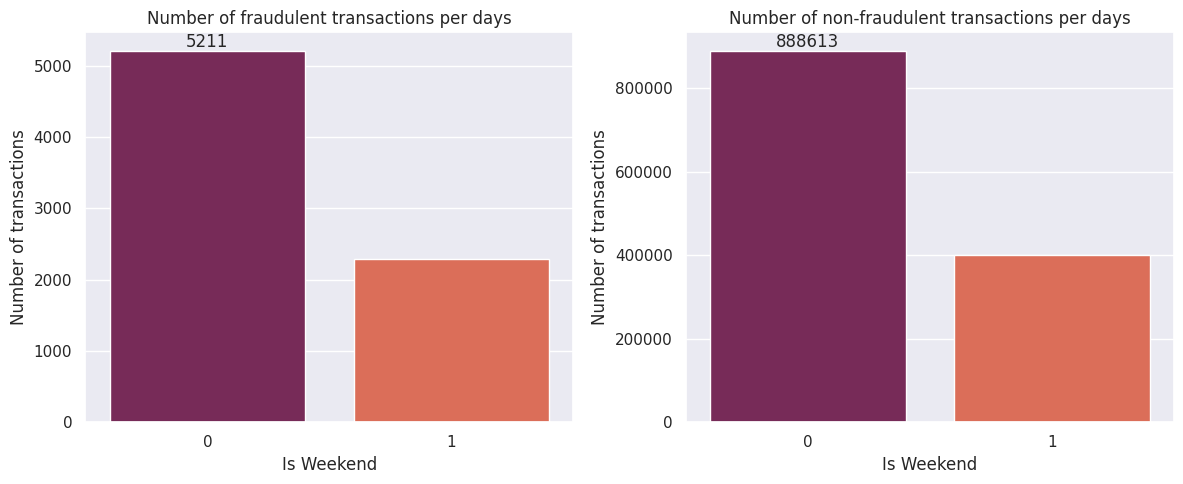

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme()

g_fraud = fraud.is_weekend.value_counts().reset_index()
g_fraud.columns = ["Gender", "Counts"]
g_not_fraud = not_fraud.is_weekend.value_counts().reset_index()
g_not_fraud.columns = ["Gender", "Counts"]

sns.barplot(x="Gender", y="Counts", data=g_fraud, ax=axes[0], palette="rocket")
axes[0].set_title("Number of fraudulent transactions per days")
axes[0].set_xlabel("Is Weekend")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="Gender", y="Counts", data=g_not_fraud, ax=axes[1], palette="rocket")
axes[1].set_title("Number of non-fraudulent transactions per days")
axes[1].set_xlabel("Is Weekend")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

<ipython-input-54-7b1d4740fc79>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="trans_month", y="Counts", data=r_fraud, ax=axes[0], palette= "rocket")
<ipython-input-54-7b1d4740fc79>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="trans_month", y="Counts", data=r_not_fraud, ax=axes[1], palette="rocket")


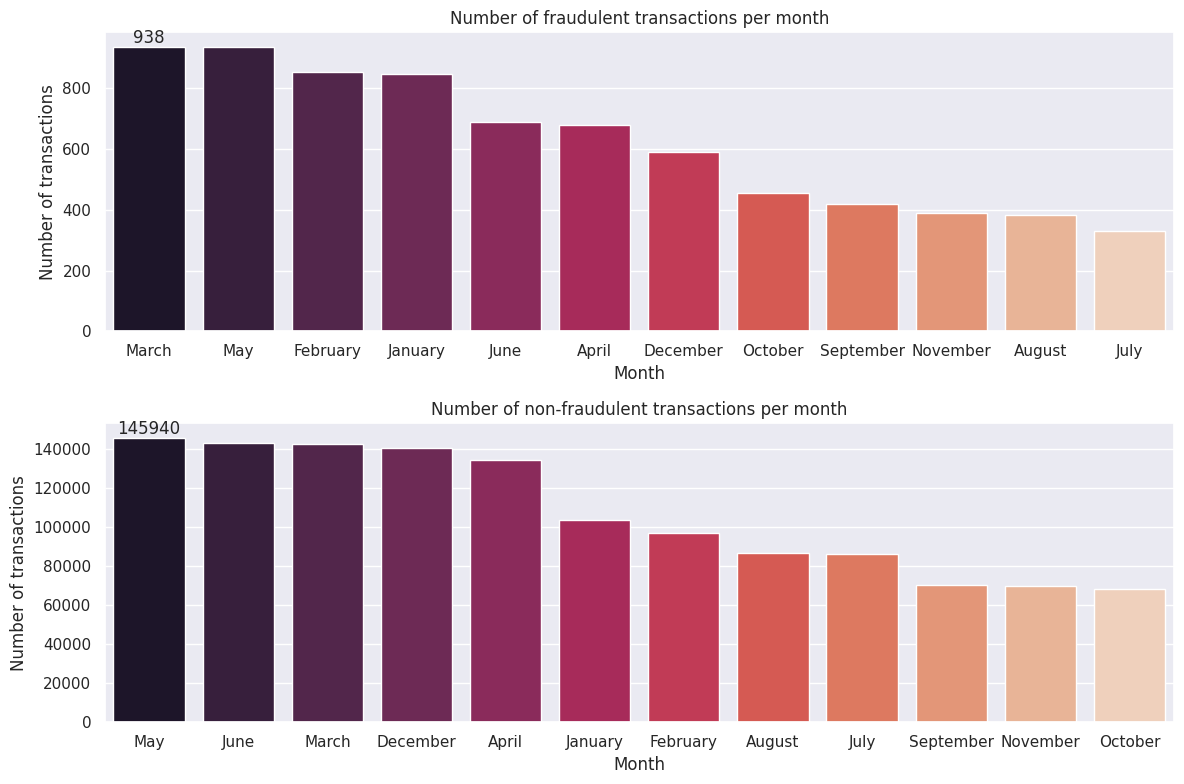

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

sns.set_theme()

r_fraud = fraud.trans_month.value_counts().reset_index()
r_fraud.columns = ["trans_month", "Counts"]
r_not_fraud = not_fraud.trans_month.value_counts().reset_index()
r_not_fraud.columns = ["trans_month", "Counts"]

sns.barplot(x="trans_month", y="Counts", data=r_fraud, ax=axes[0], palette= "rocket")
axes[0].set_title("Number of fraudulent transactions per month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Number of transactions")
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x="trans_month", y="Counts", data=r_not_fraud, ax=axes[1], palette="rocket")
axes[1].set_title("Number of non-fraudulent transactions per month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of transactions")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()

In [ ]:
df_cleaned = df.drop(columns=['Unnamed: 0','merchant','job','street', 'lat', 'long', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',"zip","cc_num","first","last","state","city"])

In [ ]:
df_cleaned.columns

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'city_pop', 'dob',
       'is_fraud', 'trans_year', 'age', 'age_group', 'Region', 'is_weekend',
       'day_period', 'trans_month', 'job_sector'],
      dtype='object')

In [ ]:
df_cleaned.head()

,trans_date_trans_time,category,amt,gender,city_pop,dob,is_fraud,trans_year,age,age_group,Region,is_weekend,day_period,trans_month,job_sector
0,2019-01-01 00:00:18,misc_net,4.97,F,3495,1988,0,2019,31,18-35,South,0,Night,January,Legal
1,2019-01-01 00:00:44,grocery_pos,107.23,F,149,1978,0,2019,41,35-60,Far West,0,Night,January,Education
2,2019-01-01 00:00:51,entertainment,220.11,M,4154,1962,0,2019,57,35-60,Rocky Mountains,0,Night,January,Other
3,2019-01-01 00:01:16,gas_transport,45.00,M,1939,1967,0,2019,52,35-60,Rocky Mountains,0,Night,January,Legal
4,2019-01-01 00:03:06,misc_pos,41.96,M,99,1986,0,2019,33,18-35,South,0,Night,January,Healthcare


In [ ]:
encoder = LabelEncoder()
df_cleaned["category"] = encoder.fit_transform(df_cleaned["category"])
df_cleaned["gender"] = encoder.fit_transform(df_cleaned["gender"])
df_cleaned["Region"] = encoder.fit_transform(df_cleaned["Region"])
df_cleaned["trans_month"] = encoder.fit_transform(df_cleaned["trans_month"])
df_cleaned["day_period"] = encoder.fit_transform(df_cleaned["day_period"])
df_cleaned["trans_year"] = encoder.fit_transform(df_cleaned["trans_year"])
df_cleaned["job_sector"] = encoder.fit_transform(df_cleaned["job_sector"])
df_cleaned["age_group"] = encoder.fit_transform(df_cleaned["age_group"])

In [ ]:
df_cleaned.head()

,trans_date_trans_time,category,amt,gender,city_pop,dob,is_fraud,trans_year,age,age_group,Region,is_weekend,day_period,trans_month,job_sector
0,2019-01-01 00:00:18,8,4.97,0,3495,1988,0,0,31,1,4,0,3,4,5
1,2019-01-01 00:00:44,4,107.23,0,149,1978,0,0,41,2,0,0,3,4,1
2,2019-01-01 00:00:51,0,220.11,1,4154,1962,0,0,57,2,3,0,3,4,8
3,2019-01-01 00:01:16,2,45.00,1,1939,1967,0,0,52,2,3,0,3,4,5
4,2019-01-01 00:03:06,9,41.96,1,99,1986,0,0,33,1,4,0,3,4,3


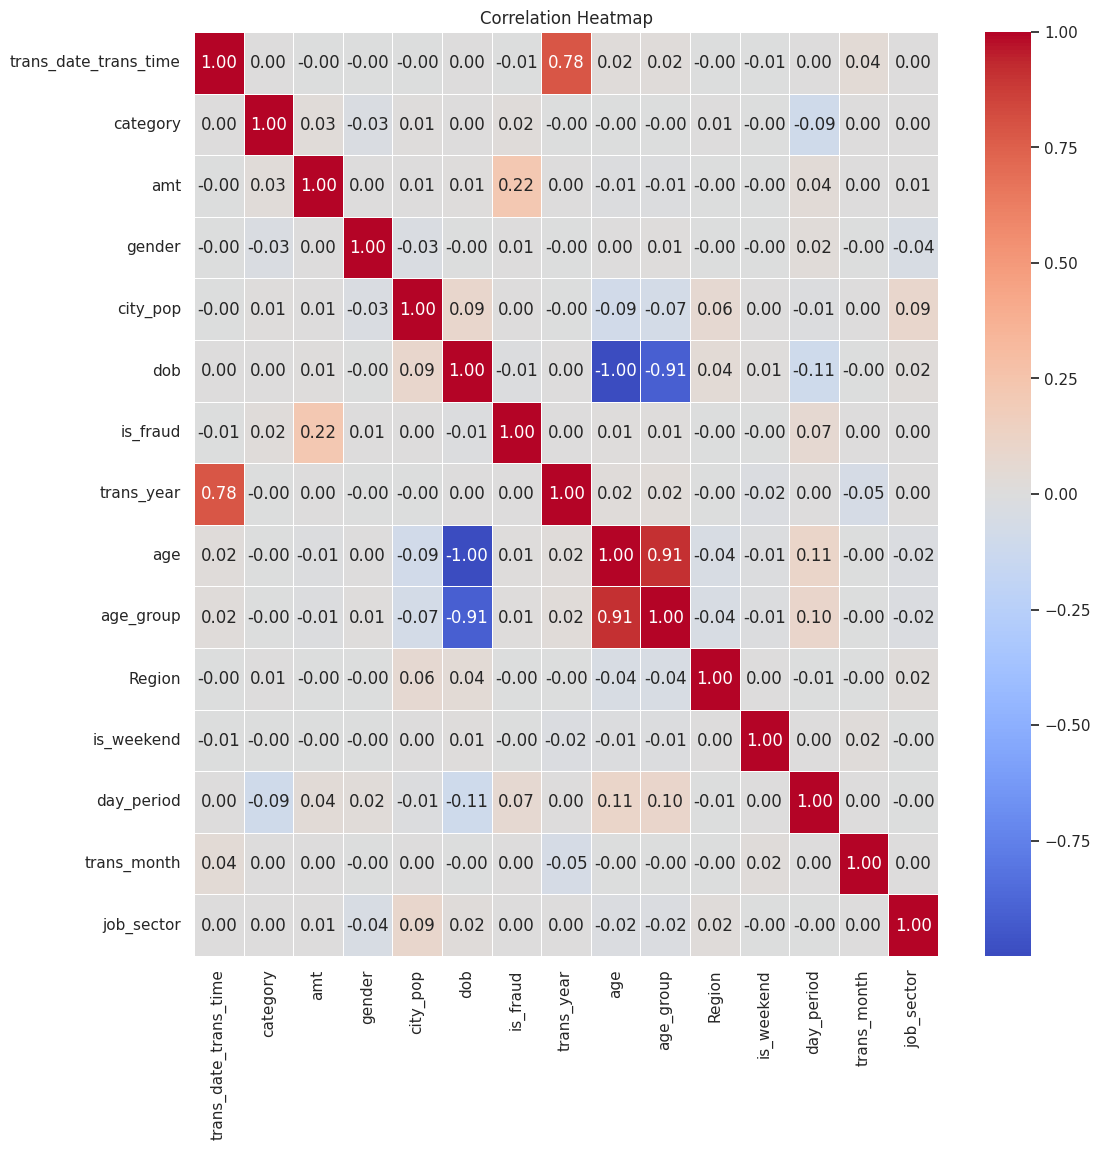

In [ ]:
corr_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 12))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
fraud_df = df[df['is_fraud'] == 1]
non_fraud_df = df[df['is_fraud'] == 0]

fraud_subset = fraud_df.sample(n=7000, random_state=42,replace = False)
non_fraud_subset = non_fraud_df.sample(n=10000, random_state=42, replace = False)

combined_df = pd.concat([fraud_subset, non_fraud_subset])

combined_df.reset_index(drop=True, inplace=True)

In [ ]:
df = combined_df

# **Data Splitting**

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
amt = X_test['amt']

In [ ]:
# Drop the datetime column(s) - replace 'trans_date_trans_time' with the actual column name(s)
X_train = X_train.drop('trans_date_trans_time', axis=1)
X_test = X_test.drop('trans_date_trans_time', axis=1)

# Now apply StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y.value_counts()

,count
is_fraud,
0,10000
1,7000


# **Modeling**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




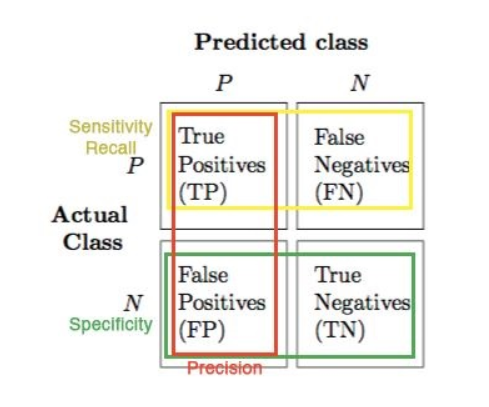

## - Get best hyperparameters using Ant Colony Optimization (ACO)




##- **Randomforest**


In [ ]:
"""# Define the hyperparameter search space
hyperparameter_space = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize pheromones
pheromones = initialize_pheromones(hyperparameter_space)

# Define the number of iterations and ants
num_iterations = 10
num_ants = 5

for iteration in range(num_iterations):
    for ant in range(num_ants):
        # Select hyperparameters for this ant
        hyperparameter_set = select_hyperparameters(pheromones, hyperparameter_space)

        # Train the model using the selected hyperparameters
        model = RandomForestClassifier(**hyperparameter_set)
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)

        # Update pheromones based on the model's performance
        update_pheromones(pheromones, hyperparameter_set, accuracy)

    # Evaporate pheromones after each generation
    evaporate_pheromones(pheromones)

# After iterations, choose the best hyperparameters
best_hyperparameters = select_hyperparameters(pheromones, hyperparameter_space)
print("Best hyperparameters found:", best_hyperparameters)
"""

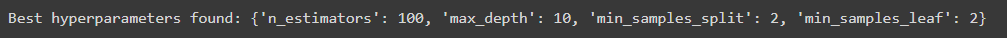

In [ ]:
rf = RandomForestClassifier(
    criterion='gini',
    max_depth= 10,
    n_estimators = 100 ,
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=13
)


In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=13)

In [ ]:
rf_y_pred = rf.predict(X_test)

In [ ]:
rf_score = pd.DataFrame({
    'Model': ['Random Forest'],
    'Sampling': ['Undersampling'],
    'Recall': [rf_Recall],
    'Precision': [rf_Precision],
    'F1 Score': [rf_f1],
    'Accuracy': [rf_accuracy]
})

print(rf_score)


           Model       Sampling    Recall  Precision  F1 Score  Accuracy
0  Random Forest  Undersampling  0.919482   0.963102  0.940787  0.952647


In [ ]:
cm = confusion_matrix(y_test, rf_y_pred)
rf_Recall = recall_score(y_test, rf_y_pred)
rf_Precision = precision_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

print(cm)

[[1960   49]
 [ 112 1279]]


In [ ]:
 # Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Precision:", precision_score(y_test, rf_y_pred))
print("Recall:", recall_score(y_test, rf_y_pred))
print("F1 Score:", f1_score(y_test, rf_y_pred))

Accuracy: 0.9526470588235294
Precision: 0.9631024096385542
Recall: 0.9194823867721064
F1 Score: 0.9407870540639941


In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1960   49]
 [ 112 1279]]


- ## **Decision Tree**





In [ ]:
"""
# Define the hyperparameter search space for Decision Tree
hyperparameter_space = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Initialize pheromones
pheromones = initialize_pheromones(hyperparameter_space)

# Define the number of iterations and ants
num_iterations = 10
num_ants = 5
accuracy = 0

for iteration in range(num_iterations):
    for ant in range(num_ants):
        # Select hyperparameters for this ant
        hyperparameter_set = select_hyperparameters(pheromones, hyperparameter_space)

        # Train the Decision Tree model using the selected hyperparameters
        model = DecisionTreeClassifier(**hyperparameter_set)
        model.fit(X_train, y_train)

        # Predict and calculate the accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Update pheromones based on the model's performance
        update_pheromones(pheromones, hyperparameter_set, accuracy)

    # Evaporate pheromones after each generation
    evaporate_pheromones(pheromones)

# After iterations, choose the best hyperparameters
best_hyperparameters = select_hyperparameters(pheromones, hyperparameter_space)
print("Best hyperparameters found:", best_hyperparameters)
print("accuracy:", accuracy)

"""

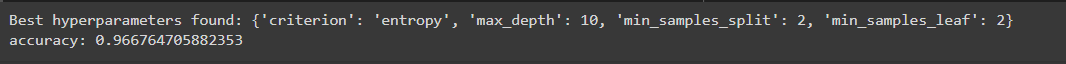

In [ ]:
dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth= 10,
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=13
)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       random_state=13)

In [ ]:
dt_y_pred = dt.predict(X_test)

In [ ]:
# Evaluate the model
cm = confusion_matrix(y_test, dt_y_pred)
dt_Recall = recall_score(y_test, dt_y_pred)
dt_Precision = precision_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(cm)


[[1939   70]
 [  42 1349]]


In [ ]:
dt_score = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Sampling': ['Undersampling'],
    'Recall': [dt_Recall],
    'Precision': [dt_Precision],
    'F1 Score': [dt_f1],
    'Accuracy': [dt_accuracy]
})

print(dt_score)

           Model       Sampling    Recall  Precision  F1 Score  Accuracy
0  Decision Tree  Undersampling  0.969806   0.950669  0.960142  0.967059


In [ ]:
 # Evaluate the model
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Precision:", precision_score(y_test, dt_y_pred))
print("Recall:", recall_score(y_test, dt_y_pred))
print("F1 Score:", f1_score(y_test, dt_y_pred))

Accuracy: 0.9670588235294117
Precision: 0.9506694855532065
Recall: 0.9698058950395398
F1 Score: 0.9601423487544484


In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_test, dt_y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1939   70]
 [  42 1349]]


- ## Logestic

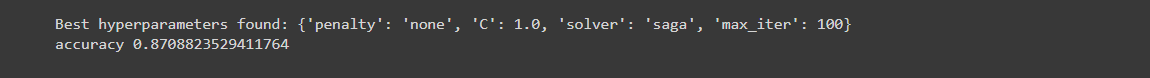

In [ ]:
log_reg = LogisticRegression(
            penalty= 'elasticnet',
            C=1.0,
            solver='saga',
            max_iter=100,
            random_state=42,
            l1_ratio=0.5 # Added l1_ratio parameter
        )

In [ ]:
hyperparameter_space = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 500]
}

In [ ]:
"""# Initialize pheromones
pheromones = initialize_pheromones(hyperparameter_space)

# Define the number of iterations and ants
num_iterations = 10
num_ants = 5
acc = 0
for iteration in range(num_iterations):
    for ant in range(num_ants):
        # Select hyperparameters for this ant
        hyperparameter_set = select_hyperparameters(pheromones, hyperparameter_space)

        # Train the Logistic Regression model using the selected hyperparameters
        model = LogisticRegression(
            penalty=hyperparameter_set['penalty'],
            C=hyperparameter_set['C'],
            solver=hyperparameter_set['solver'],
            max_iter=hyperparameter_set['max_iter'],
            random_state=42
        )

        # Since Logistic Regression may not support all penalties with all solvers, add error handling
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            acc = accuracy
        except Exception as e:
            accuracy = 0  # Assign a very low score if the model fails
            acc = accuracy

        # Update pheromones based on the model's performance
        update_pheromones(pheromones, hyperparameter_set, accuracy)

    # Evaporate pheromones after each generation
    evaporate_pheromones(pheromones)

# After iterations, choose the best hyperparameters
best_hyperparameters = select_hyperparameters(pheromones, hyperparameter_space)
print("Best hyperparameters found:", best_hyperparameters)
print("accuracy", acc)
"""

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', random_state=42,
                   solver='saga')

In [ ]:
log_regy_pred = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, log_reg.predict(X_train))
print("Training Accuracy:", accuracy)

Training Accuracy: 0.8761764705882353


In [ ]:
cm = confusion_matrix(y_test, log_regy_pred)
log_reg_Recall = recall_score(y_test, log_regy_pred)
log_reg_Precision = precision_score(y_test, log_regy_pred)
log_reg_f1 = f1_score(y_test, log_regy_pred)
log_reg_accuracy = accuracy_score(y_test, log_regy_pred)
print(cm)

[[1907  102]
 [ 337 1054]]


In [ ]:
log_reg__score = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Sampling': ['Undersampling'],
    'Recall': [log_reg_Recall],
    'Precision': [log_reg_Precision],
    'F1 Score': [log_reg_f1],
    'Accuracy': [log_reg_accuracy]
})

print(log_reg__score)

                 Model       Sampling    Recall  Precision  F1 Score  Accuracy
0  Logistic Regression  Undersampling  0.757728   0.911765   0.82764  0.870882


In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_test, log_regy_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1907  102]
 [ 337 1054]]


In [ ]:
## after apply bagging

In [ ]:
# Initialize Logistic Regression with the best parameters
log_reg = LogisticRegression(
            penalty='elasticnet',
            C=1.0,
            solver='saga',
            max_iter=100,
            random_state=42,
            l1_ratio=0.99  # L1 ratio for elastic net
        )

# Create the Bagging Classifier with Logistic Regression as the base estimator
bagging_model = BaggingClassifier(base_estimator=log_reg, n_estimators=200, random_state=42, n_jobs=-1)

# Train the bagging classifier
bagging_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging with Logistic Regression (Best Parameters) Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Bagging with Logistic Regression (Best Parameters) Accuracy: 0.8711764705882353


- conc same accuracy